In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [ ]:
df=pd.read_csv('/content/Library_Usage.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      355544 non-null  object 
 8   Circulation Active Year       355544 non-null  float64
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [ ]:
df.duplicated().sum()

54918

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(368530, 15)

In [ ]:
df.isnull().mean()*100

,0
Patron Type Code,0.000000
Patron Type Definition,0.000000
Total Checkouts,0.000000
Total Renewals,0.000000
Age Range,0.055626
Home Library Code,0.010854
Home Library Definition,0.000000
Circulation Active Month,4.974358
Circulation Active Year,4.974358
Notice Preference Code,0.000000


In [ ]:
data=df.iloc[: , :-1]

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(350029, 14)

In [ ]:
data.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012.0,z,email,True,2003,True
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015.0,z,email,True,2003,False
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015.0,z,email,True,2003,True
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016.0,z,email,True,2003,False
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016.0,z,email,True,2003,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350029 entries, 0 to 423447
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              350029 non-null  int64  
 1   Patron Type Definition        350029 non-null  object 
 2   Total Checkouts               350029 non-null  int64  
 3   Total Renewals                350029 non-null  int64  
 4   Age Range                     350029 non-null  object 
 5   Home Library Code             350029 non-null  object 
 6   Home Library Definition       350029 non-null  object 
 7   Circulation Active Month      350029 non-null  object 
 8   Circulation Active Year       350029 non-null  float64
 9   Notice Preference Code        350029 non-null  object 
 10  Notice Preference Definition  350029 non-null  object 
 11  Provided Email Address        350029 non-null  bool   
 12  Year Patron Registered        350029 non-null  in

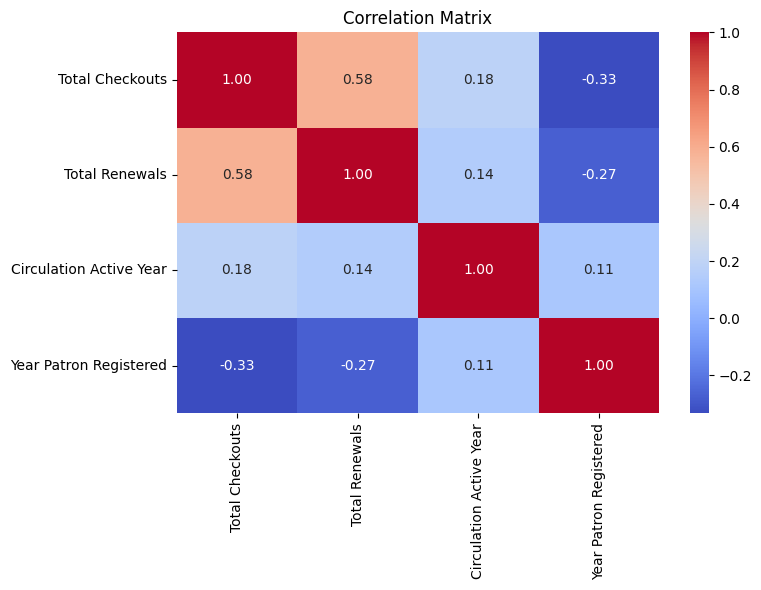

In [ ]:
# 1:Calculate correlation matrix
correlation_data = data[['Total Checkouts', 'Total Renewals', 'Circulation Active Year', 'Year Patron Registered']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


The correlation matrix suggests a strong relationship between Total Checkouts and Total Renewals, meaning that users who check out books are also more likely to renew them. Weak Positive Correlation between Total Checkouts and Circulation Active Year this indicates that patrons who have been actively borrowing books for longer tend to check out slightly more.

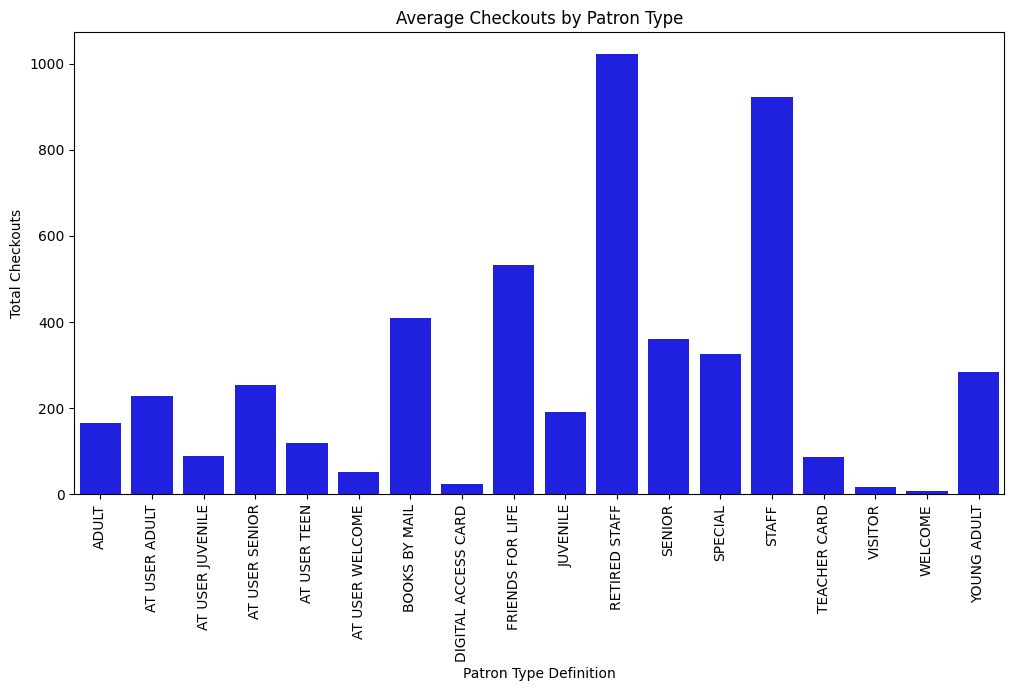

In [ ]:
# 2. Engagement by Patron Type and Age Range
engagement_by_patron_type = data.groupby('Patron Type Definition')[['Total Checkouts', 'Total Renewals']].mean().reset_index()
engagement_by_age = data.groupby('Age Range')[['Total Checkouts', 'Total Renewals']].mean().reset_index()

# Plot engagement by Patron Type
plt.figure(figsize=(12, 6))
sns.barplot(x='Patron Type Definition', y='Total Checkouts', data=engagement_by_patron_type)
plt.title('Average Checkouts by Patron Type')
plt.xticks(rotation=90)
plt.show()

Retired Staff and Staff patron type are showing high checkout. Digital access card shows lower checkout.

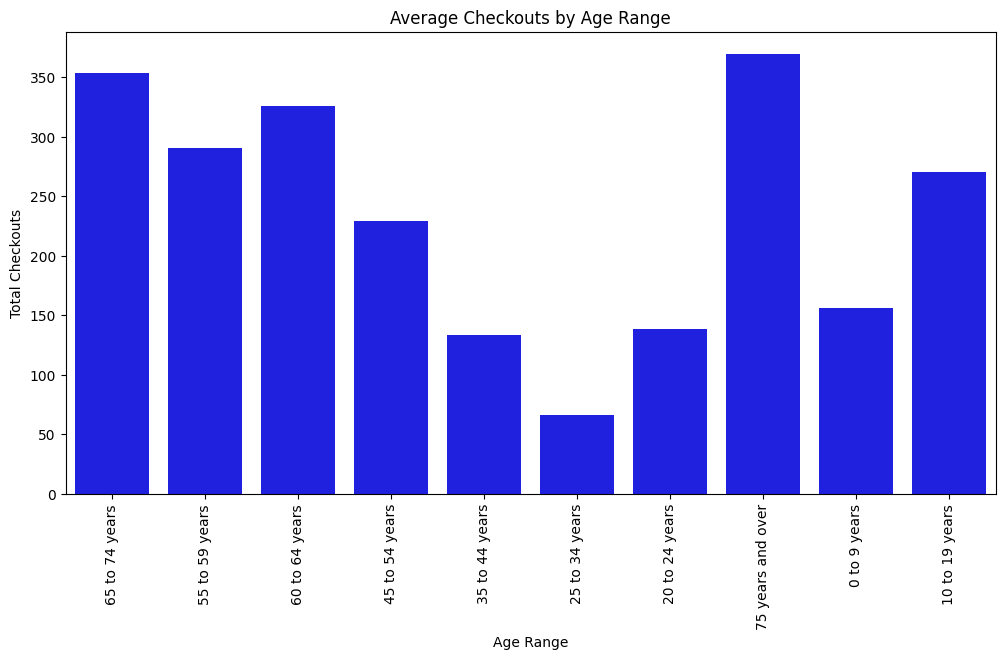

In [ ]:
# Plot engagement by Age Range
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Range', y='Total Checkouts', data=engagement_by_age, order=data['Age Range'].dropna().unique())
plt.title('Average Checkouts by Age Range')
plt.xticks(rotation=90)
plt.show()

Senior age group shows high activity followed by younger generation and low usagein the midle age group can be obsererved.

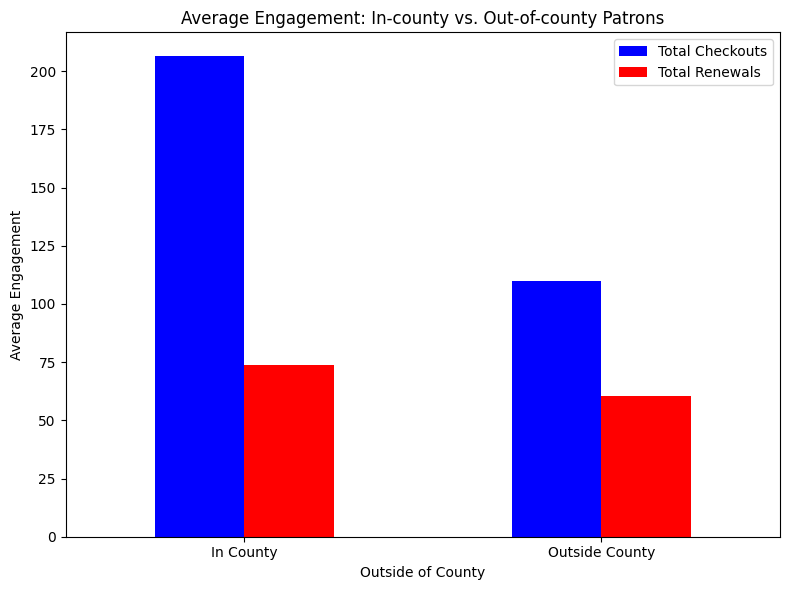

In [ ]:
### 3: Engagement for in-county vs. out-of-county patrons ###
county_engagement = data.groupby('Outside of County')[['Total Checkouts', 'Total Renewals']].mean()

# Plotting engagement comparison
county_engagement.plot(kind='bar', figsize=(8, 6), color=['blue', 'red'])
plt.title('Average Engagement: In-county vs. Out-of-county Patrons')
plt.xlabel('Outside of County')
plt.ylabel('Average Engagement')
plt.xticks(ticks=[0, 1], labels=['In County', 'Outside County'], rotation=0)
plt.tight_layout()
plt.show()

In-county patrons show significantly higher checkouts (blue bar) and renewals (red bar) compared to out-of-county users. While out-of-county users still utilize library resources, their engagement is noticeably lower than in-county users. Although checkouts are lower for out-of-county patrons, their renewal rate remains relatively close to in-county users.

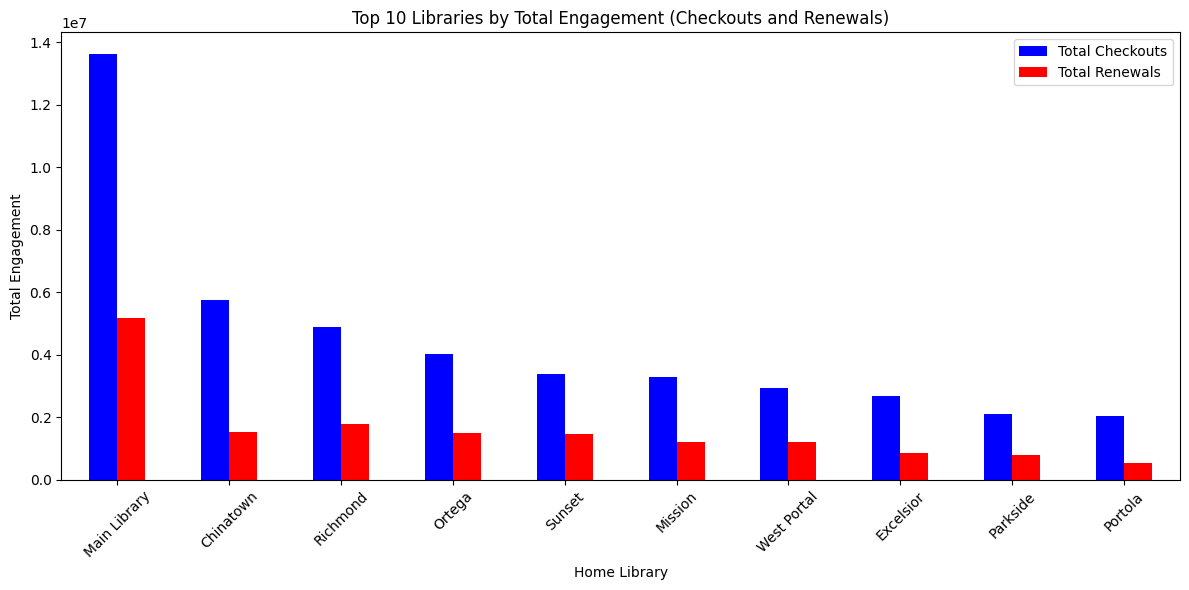

In [ ]:
### 4: Engagement by home library ###
library_engagement = data.groupby('Home Library Definition')[['Total Checkouts', 'Total Renewals']].sum().sort_values(by='Total Checkouts', ascending=False)

# Plotting total engagement by library
library_engagement.head(10).plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])
plt.title('Top 10 Libraries by Total Engagement (Checkouts and Renewals)')
plt.xlabel('Home Library')
plt.ylabel('Total Engagement')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

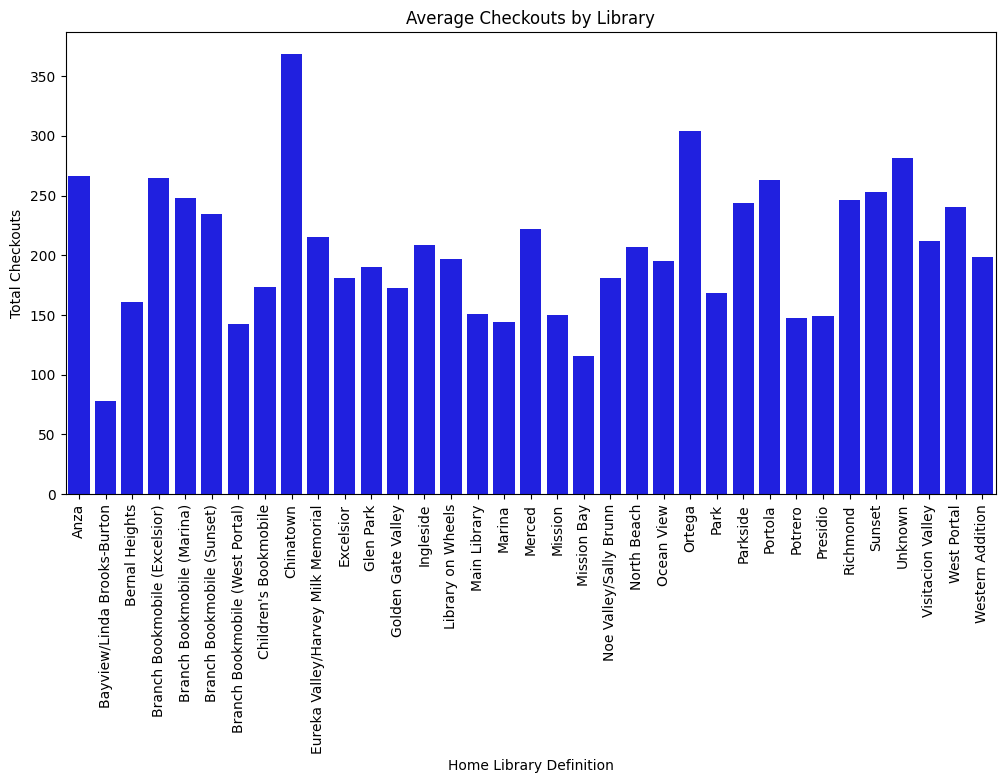

In [ ]:
# 5. Engagement by Home Library
library_engagement = data.groupby('Home Library Definition')[['Total Checkouts', 'Total Renewals']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Home Library Definition', y='Total Checkouts', data=library_engagement)
plt.title('Average Checkouts by Library')
plt.xticks(rotation=90)
ouplt.show()

A few libraries have notably higher checkout. These high-performing libraries may have larger collections, better facilities, or more active user bases. Chinatown, Ortega and other Libraries are have more patron checkout. Bayview/Linda brooks-Burton has less patron checkout.

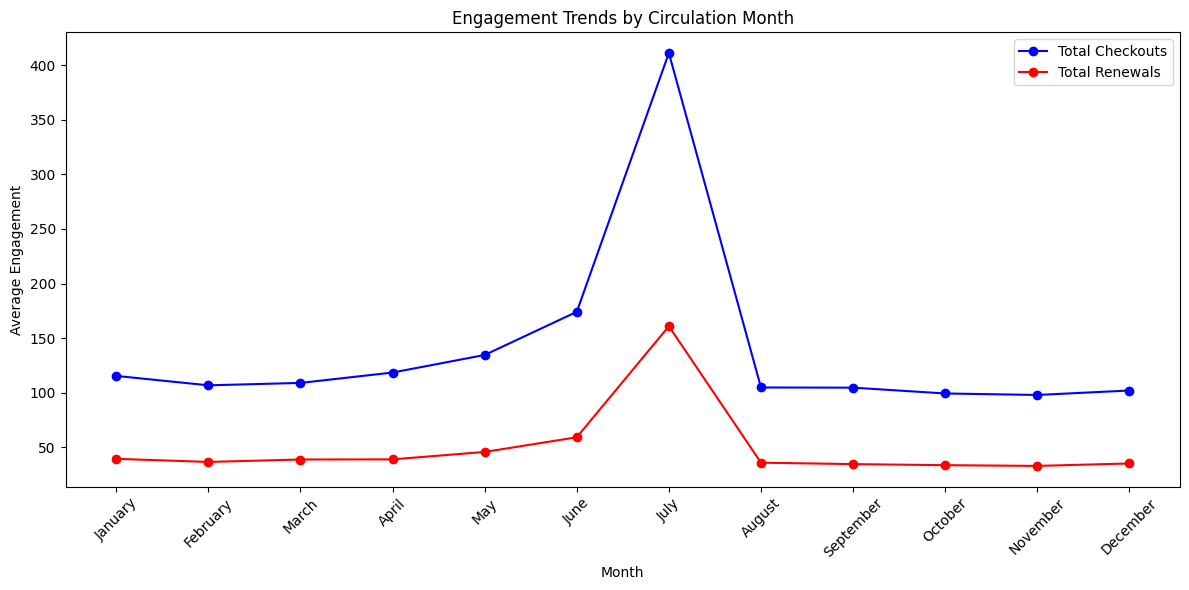

In [ ]:
### 6: Engagement trends by circulation month ###
monthly_engagement = data.groupby('Circulation Active Month')[['Total Checkouts', 'Total Renewals']].mean()

# Sort months in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_engagement = monthly_engagement.reindex(month_order)

monthly_engagement.plot(kind='line', figsize=(12, 6), marker='o')

# Adding title and labels
plt.title('Engagement Trends by Circulation Month')
plt.xlabel('Month')
plt.ylabel('Average Engagement')
plt.xticks(ticks=range(len(month_order)), labels=month_order, rotation=45)
plt.tight_layout()
plt.show()


The seasonal trends in library engagement show a distinct spike in July, where both total checkouts (blue line) and total renewals (red line) experience a sharp increase. A slight increase leading up to July suggests that library usage builds up over the first half of the year. Engagement drops significantly from August onwards, stabilizing at lower levels for the rest of the year.

<Figure size 1200x600 with 0 Axes>

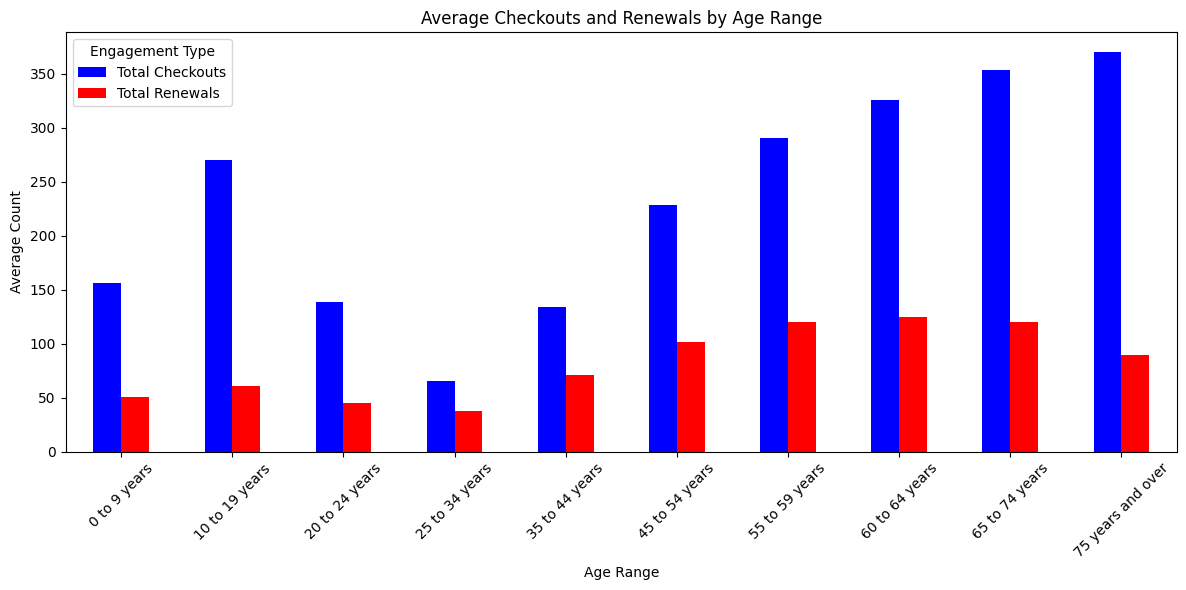

In [ ]:
### 7: Relationship between age range and total checkouts/renewals ###
age_engagement = data.groupby('Age Range')[['Total Checkouts', 'Total Renewals']].mean().sort_index()
plt.figure(figsize=(12, 6))

# Explicitly setting bar colors to blue and red
age_engagement.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])

# Adding title, labels, and legends
plt.title('Average Checkouts and Renewals by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(title="Engagement Type", labels=["Total Checkouts", "Total Renewals"], loc='upper left')
plt.tight_layout()
plt.show()


The 65–74 and 75+ age groups have the highest checkouts and renewals, indicating that senior patrons are the most active users of the library. Middle-Aged Adults (35–54 years) Engagement is steady but lower compared to seniors. The 0–9 and 10–19 age groups have moderate checkouts but relatively lower renewals.

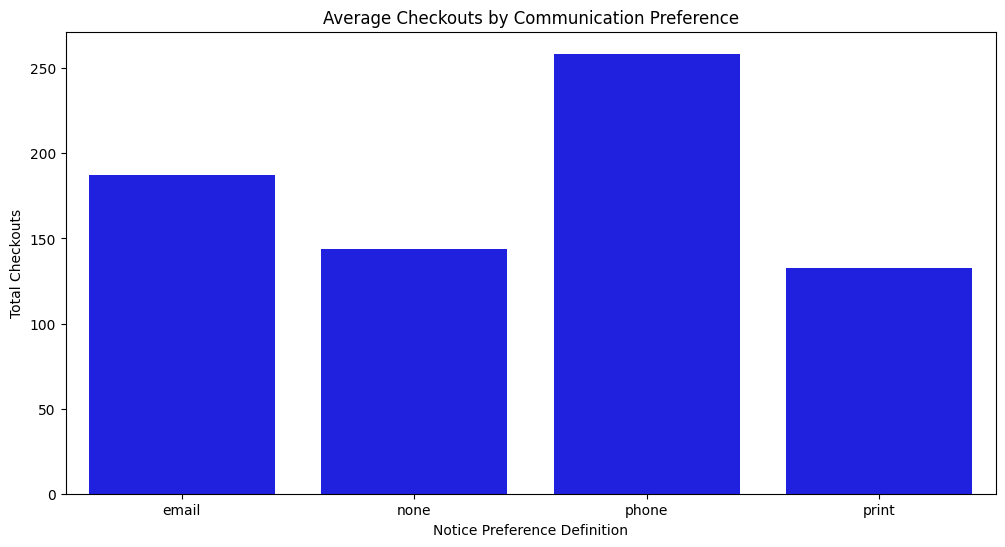

In [ ]:
# 3. Communication Preference Analysis
communication_engagement = data.groupby('Notice Preference Definition')[['Total Checkouts', 'Total Renewals']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Notice Preference Definition', y='Total Checkouts', data=communication_engagement)
plt.title('Average Checkouts by Communication Preference')
plt.show()

Users who prefer phone notifications have the highest checkouts, indicating that direct verbal reminders may be more effective in encouraging library engagement. Users who prefer printed notifications or have no communication preference show lower checkout rates.

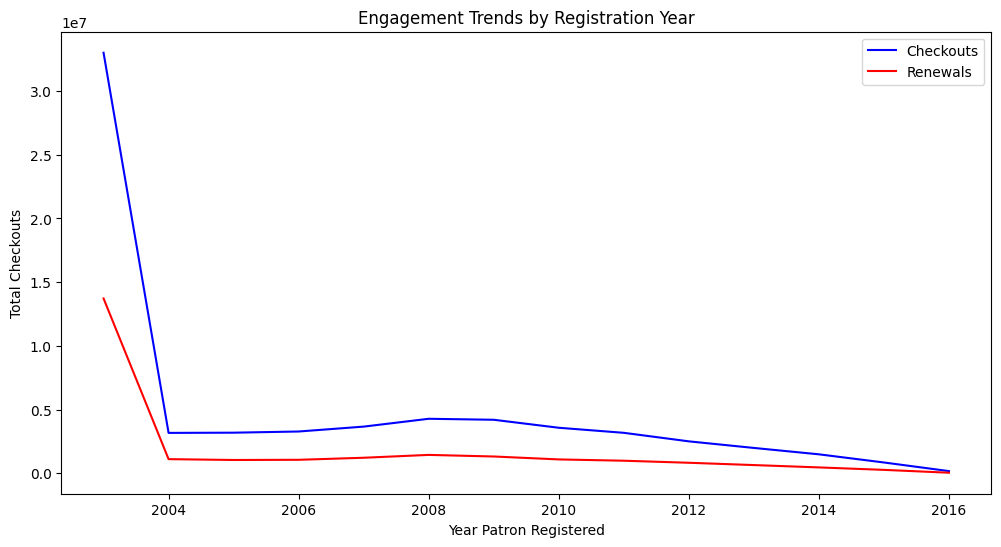

In [ ]:
# 9. Trends Over Time (Registration Year and Active Year)
registration_trends = data.groupby('Year Patron Registered')[['Total Checkouts', 'Total Renewals']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year Patron Registered', y='Total Checkouts', data=registration_trends, label='Checkouts')
sns.lineplot(x='Year Patron Registered', y='Total Renewals', data=registration_trends, label='Renewals')
plt.title('Engagement Trends by Registration Year')
plt.legend()
plt.show()

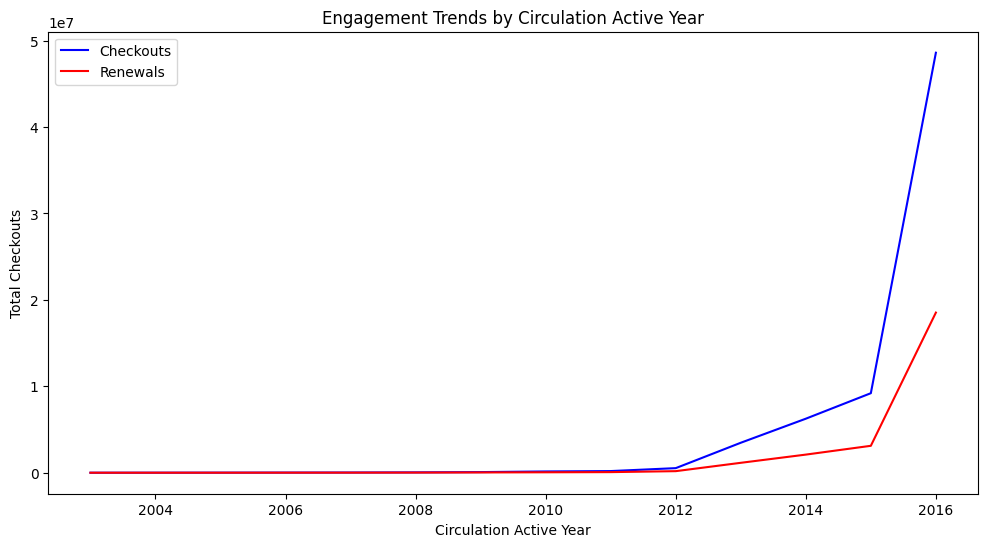

In [ ]:
activity_trends = data.groupby('Circulation Active Year')[['Total Checkouts', 'Total Renewals']].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Circulation Active Year', y='Total Checkouts', data=activity_trends, label='Checkouts')
sns.lineplot(x='Circulation Active Year', y='Total Renewals', data=activity_trends, label='Renewals')
plt.title('Engagement Trends by Circulation Active Year')
plt.legend()
plt.show()

The engagement trends over time show a sharp increase in both checkouts and renewals after 2015, with a particularly steep rise in recent years. This indicates a growing demand for library resources. Before 2012, the number of checkouts and renewals remained relatively low and stable, suggesting limited growth in library usage. A dramatic rise in both checkouts and renewals suggests a major shift in user engagement.